# AR(2) proces. Podmínky stacionarity a různá chování v závislosti na poloze kořenů charakteristické rovnice

## Úvod do AR(2) procesu
Autoregresní proces druhého řádu, označovaný jako AR(2), má obecnou podobu:
$$
X_t = \phi_1 X_{t-1} + \phi_2 X_{t-2} + \varepsilon_t,
$$
kde:
- $x_t$ je aktuální hodnota časové řady,
- $\phi_1$ a $\phi_2$ jsou autoregresní koeficienty,
- $\varepsilon_t \sim \text{i.i.d. } N(0, \sigma^2)$ je šum.

Tento proces modeluje aktuální hodnotu $X_t$ jako lineární kombinaci dvou předchozích hodnot a šumu.

### AR(2)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


In [2]:
# Funkce pro generování dat AR(2) procesu
def generate_ar2(phi1, phi2, sigma, n):
    """
    Generuje AR(2) proces podle rovnice:
    X_t = phi1 * X_{t-1} + phi2 * X_{t-2} + epsilon_t

    Parametry:
    phi1, phi2: Koeficienty AR(2) modelu
    sigma: Směrodatná odchylka šumu
    n: Počet pozorování
    """
    np.random.seed(42)
    epsilon = np.random.normal(0, sigma, n)
    x = np.zeros(n)

    for t in range(2, n):
        x[t] = phi1 * x[t-1] + phi2 * x[t-2] + epsilon[t]

    return x

def plot_time_series(data, title="AR(2) Časová řada"):
    """
    Vizualizace časové řady.
    """
    plt.figure(figsize=(10, 5))
    plt.plot(data, label="Časová řada")
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

# Funkce pro vizualizaci ACF a PACF
def plot_acf_pacf(data):
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))

    # Graf ACF
    plot_acf(data, lags=30, ax=axes[0])
    axes[0].set_title("ACF")

    # Graf PACF
    plot_pacf(data, lags=30, ax=axes[1])
    axes[1].set_title("PACF")

    plt.show()


In [3]:
# Generování dat
n = 1000
phi1, phi2, sigma = 1.5, -0.6, 1
data = generate_ar2(phi1, phi2, sigma, n)

# Odhad parametrů pomocí statsmodels
model = sm.tsa.AutoReg(data, lags=2).fit()

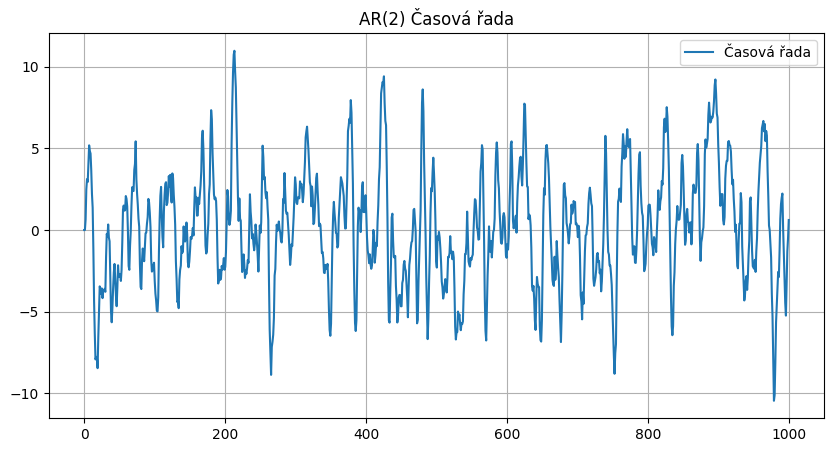

In [4]:
plot_time_series(data, title="AR(2) Časová řada")

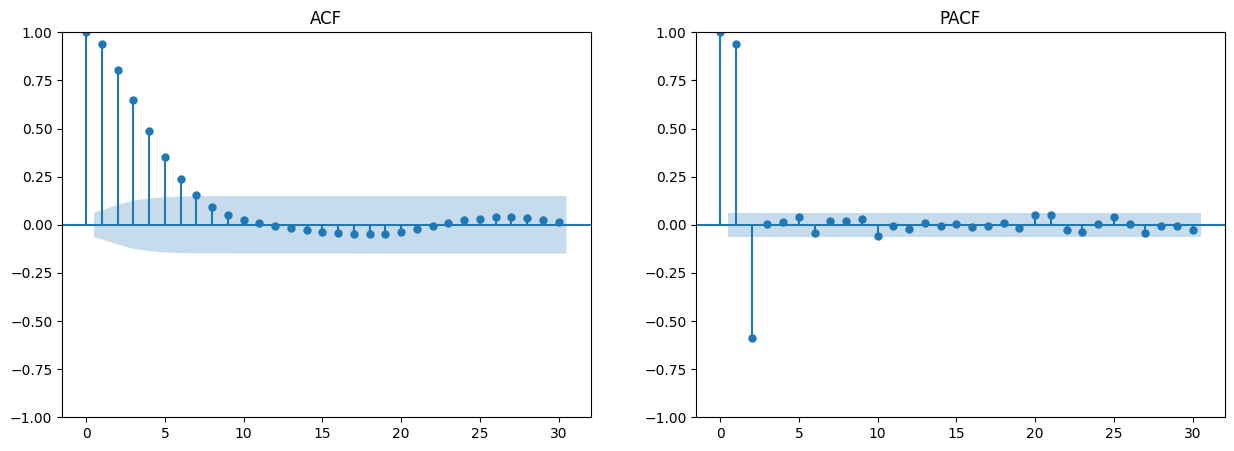

In [5]:
plot_acf_pacf(data)

## Podmínky stacionarity AR(2) procesu

Pro zjednodušení analýzy zavádíme operátor zpoždění $B$, definovaný jako $B X_t = X_{t-1}$ a $B^k X_t = X_{t-k}$. Rovnice procesu pak může být přepsána jako:
$$
(1 - \phi_1 B - \phi_2 B^2)X_t = \varepsilon_t.
$$

kde $\Phi(B)$ je charakteristický polynom:
$$
\Phi(B) = 1 - \phi_1 B - \phi_2 B^2.
$$

## Analýza stacionarity AR(2) procesu

### Úvod
Autoregresní proces druhého řádu, označovaný jako AR(2), má obecnou podobu:
$$
X_t = \phi_1 X_{t-1} + \phi_2 X_{t-2} + \varepsilon_t,
$$
kde $\varepsilon_t \sim \text{i.i.d. } N(0, \sigma^2)$ je bílý šum. Tento proces modeluje aktuální hodnotu $X_t$ jako lineární kombinaci dvou předchozích hodnot a šumu.

Pro zjednodušení analýzy zavádíme operátor zpoždění $B$, definovaný jako $B X_t = X_{t-1}$ a $B^k X_t = X_{t-k}$. Rovnice procesu pak může být přepsána jako:
$$
\Phi(B)X_t = \varepsilon_t,
$$
kde $\Phi(B)$ je charakteristický polynom:
$$
\Phi(B) = 1 - \phi_1 B - \phi_2 B^2.
$$

Alternativně charakteristický polynom lze zapsat v podobě:
$$
a^2 - \phi_1 a - \phi_2 = 0,
$$
který vznikne přepisem standardní charakteristické rovnice:
$$
1 - \phi_1 b - \phi_2 b^2 = 0 \implies b^{-2} - \phi_1 b^{-1} - \phi_2 = 0,
$$
a po substituci $b^{-1} = a$ získáme výše uvedený tvar.

**Proces je stacionarný, když kořeny této rovnice leží uvnitř jednotkového kruhu** ($|b| > 1 \iff |a| < 1$).

### **Řešení charakteristické rovnice**
Charakteristická rovnice má tvar:
$$
a^2 - \phi_1 a - \phi_2 = 0.
$$
Kořeny této kvadratické rovnice jsou dány vzorcem:
$$
a_{1,2} = \frac{\phi_1 \pm \sqrt{\phi_1^2 + 4\phi_2}}{2}.
$$

#### **Případ reálných kořenů**

Kořeny jsou reálné, pokud platí:
$$
\phi_1^2 + 4\phi_2 \geq 0.
$$
V tomto případě analyzujeme dva reálné kořeny $a_1$ a $a_2$:

Větší kořen:
$$
a_1 = \frac{\phi_1 + \sqrt{\phi_1^2 + 4\phi_2}}{2}.
$$
Pro stacionaritu požadujeme, aby ležel uvnitř jednotkového kruhu:
$$
a_1 < 1 \implies \phi_1 + \sqrt{\phi_1^2 + 4\phi_2} < 2.
$$
Po úpravě dostáváme podmínku:
$$
\phi_2 < 1 - \phi_1.
$$
Menší kořen:
$$
a_2 = \frac{\phi_1 - \sqrt{\phi_1^2 + 4\phi_2}}{2}.
$$
Pro stacionaritu požadujeme, aby ležel uvnitř jednotkového kruhu:
$$
a_2 > -1 \implies \phi_1 - \sqrt{\phi_1^2 + 4\phi_2} > -2.
$$
Po úpravě dostáváme podmínku:
$$
\phi_2 < 1 + \phi_1.
$$

#### **Případ komplexních kořenů**

Kořeny jsou komplexní, pokud platí:
$$
\phi_1^2 + 4\phi_2 < 0.
$$
V tomto případě mají kořeny tvar:
$$
a_{1,2} = \frac{\phi_1}{2} \pm i \frac{\sqrt{-(\phi_1^2 + 4\phi_2)}}{2},
$$
kde reálná část je $\text{Re}(a) = \frac{\phi_1}{2}$ a imaginární část $\text{Im}(a) = \frac{\sqrt{-(\phi_1^2 + 4\phi_2)}}{2}$.
Velikost kořenů je dána vztahem:
$$
|a|^2 = \left(\frac{\phi_1}{2}\right)^2 + \left(\frac{\sqrt{-(\phi_1^2 + 4\phi_2)}}{2}\right)^2 = -\phi_2.
$$
Pro stacionaritu požadujeme:
$$
|a| < 1 \implies |\phi| < 1.
$$

#### **Shrnutí**
Podmínky stacionarity procesu AR(2) jsou:

Pokud jsou kořeny reálné:

- $\phi_2 < 1 - \phi_1$,
- $\phi_2 < 1 + \phi_1$.


Pokud jsou kořeny komplexní:
- $\phi_1^2 < -4\phi_2$
- $|\phi_2| < 1$



Tyto podmínky definují oblast stacionarity v rovině $ (\phi_1, \phi_2) $, která odpovídá stacionárnímu trojúhelníku. Zobrazíme to na obrazku.


In [6]:
def plot_stationarity_region():
    # Generování hodnot pro phi1 a phi2
    phi1 = np.linspace(-3, 3, 200)
    phi2 = np.linspace(-3, 3, 200)

    # Vytvoření mřížky pro phi1 a phi2
    PHI1, PHI2 = np.meshgrid(phi1, phi2)

    # Vytvoření prázdného pole pro oblasti
    region = np.zeros_like(PHI1)

    # Podmínky pro všechny kořeny
    condition_real1 = PHI2 < (1 - PHI1)  # φ2 < 1 - φ1
    condition_real2 = PHI2 < (1 + PHI1)  # φ2 < 1 + φ1
    condition_real3 = PHI2 < 1          # φ2 < 1
    condition_real4 = PHI2 > -1
    condition_complex2 = PHI1**2 < -4 * PHI2
    condition_real = condition_real1 & condition_real2 & condition_real3 & condition_real4 & condition_complex2

    # Podmínky pro komplexní kořeny
    condition_complex1 = PHI2 > -1  # φ2 > -1
    condition_complex2 = PHI2 < 1
    condition_complex3 = PHI1**2 < -4 * PHI2  # φ1^2 < -4φ2
    condition_complex = condition_complex1 & condition_complex2 & condition_complex3 # Komplexní kořeny

    # Určení regionů
    region[condition_real] = 1  # Pro reálné kořeny
    region[condition_complex] = 2  # Pro komplexní kořeny

    # Určení šedé zóny (mezi zelenou a ostatními podmínkami)
    region[(region == 0) & (PHI2 < 1) & (PHI2 > -1) & (PHI2 < 1 - PHI1) & (PHI2 < 1 + PHI1)] = 3  # Šedá zóna

    # Vytvoření grafu
    plt.figure(figsize=(8, 6))

    # Vizualizace pro komplexní kořeny (zelená zóna)
    plt.contourf(PHI1, PHI2, region, levels=[1, 2], colors=['green'], alpha=0.3)

    # Vizualizace pro šedou zónu
    plt.contourf(PHI1, PHI2, region, levels=[2, 3], colors=['gray'], alpha=0.5)

    # Přidání čar pro podmínky
    plt.plot(phi1, 1 + phi1, 'r--', label=r'$\phi_2 < 1 + \phi_1$', linewidth=1)
    plt.plot(phi1, 1 - phi1, 'r--', label=r'$\phi_2 < 1 - \phi_1$', linewidth=1)

    # Růžové přerušované čáry pro podmínku |phi_2| < 1
    plt.axhline(y=1, color='orange', linestyle='--', linewidth=1, label=r'$|\phi_2| < 1$')
    plt.axhline(y=-1, color='orange', linestyle='--', linewidth=1)

    # Čára pro podmínku φ1^2 < -4φ2
    plt.plot(phi1, -phi1**2 / 4, 'b-', label=r'$\phi_1^2 < -4 \phi_2$', linewidth=1)

    # Přidání popisků k podmínkám
    plt.text(-0.5, -0.5, r'$\phi_1^2 < -4 \phi_2$', fontsize=12, color='blue')
    plt.text(-1.5, 0.5, r'$\phi_2 < 1 + \phi_1$', fontsize=12, color='red')
    plt.text(1, 0.5, r'$\phi_2 < 1 - \phi_1$', fontsize=12, color='red')

    # Nastavení os a titulku grafu
    plt.title("Regiony stacionarity pro AR(2) proces", fontsize=14)
    plt.xlabel(r'$\phi_1$', fontsize=12)
    plt.ylabel(r'$\phi_2$', fontsize=12)

    # Zobrazení grafu
    plt.xlim([-3, 3])
    plt.ylim([-3, 3])  # Omezení pro osu y
    plt.grid(True)

    # Přidání legendy
    plt.legend(title="Podmínky", loc="upper left")

    # Přidání černých os přes střed
    ax = plt.gca()
    ax.axhline(y=0, color='black', linewidth=1)  # osa Ox
    ax.axvline(x=0, color='black', linewidth=1)  # osa Oy

    plt.show()

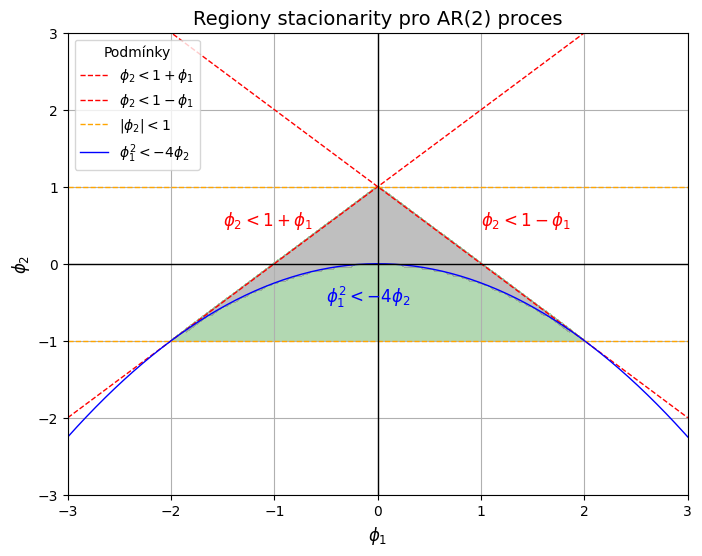

In [7]:
plot_stationarity_region()

Vypadá symetricky vzhledem k ose OY.

- Šedá oblast - stacionární proces, realné kořeny.
- Zelená oblast - stacionární proces, komplexní kořeny.
- jinak proces nestacionárný


## Různé případy




In [8]:
def generate_and_plot_ar2(phi1, phi2, sigma, n, title="AR(2) Časová řada"):
    """
    Generuje AR(2) proces a zobrazuje graf časové řady, ACF a PACF v jednom řádku.

    Parametry:
    phi1, phi2: Koeficienty AR(2) modelu
    sigma: Směrodatná odchylka šumu
    n: Počet pozorování
    title: Název grafu
    """
    # Generování AR(2) procesu
    np.random.seed(42)
    epsilon = np.random.normal(0, sigma, n)
    x = np.zeros(n)

    for t in range(2, n):
        x[t] = phi1 * x[t-1] + phi2 * x[t-2] + epsilon[t]

    # Zobrazení grafů v jednom řádku
    plt.figure(figsize=(18, 5))

    # Časová řada
    plt.subplot(1, 3, 1)
    plt.plot(x, label="Časová řada")
    plt.title(title)
    plt.xlabel("Čas")
    plt.ylabel("Hodnota")
    plt.grid(True)

    # ACF
    plt.subplot(1, 3, 2)
    plot_acf(x, lags=20, ax=plt.gca())
    plt.title(f"ACF")

    # PACF
    plt.subplot(1, 3, 3)
    plot_pacf(x, lags=20, ax=plt.gca())
    plt.title(f"PACF")

    # Zobrazení všech grafů
    plt.tight_layout()  # Zajistí správné rozmístění
    plt.show()

### Stacionární procesy

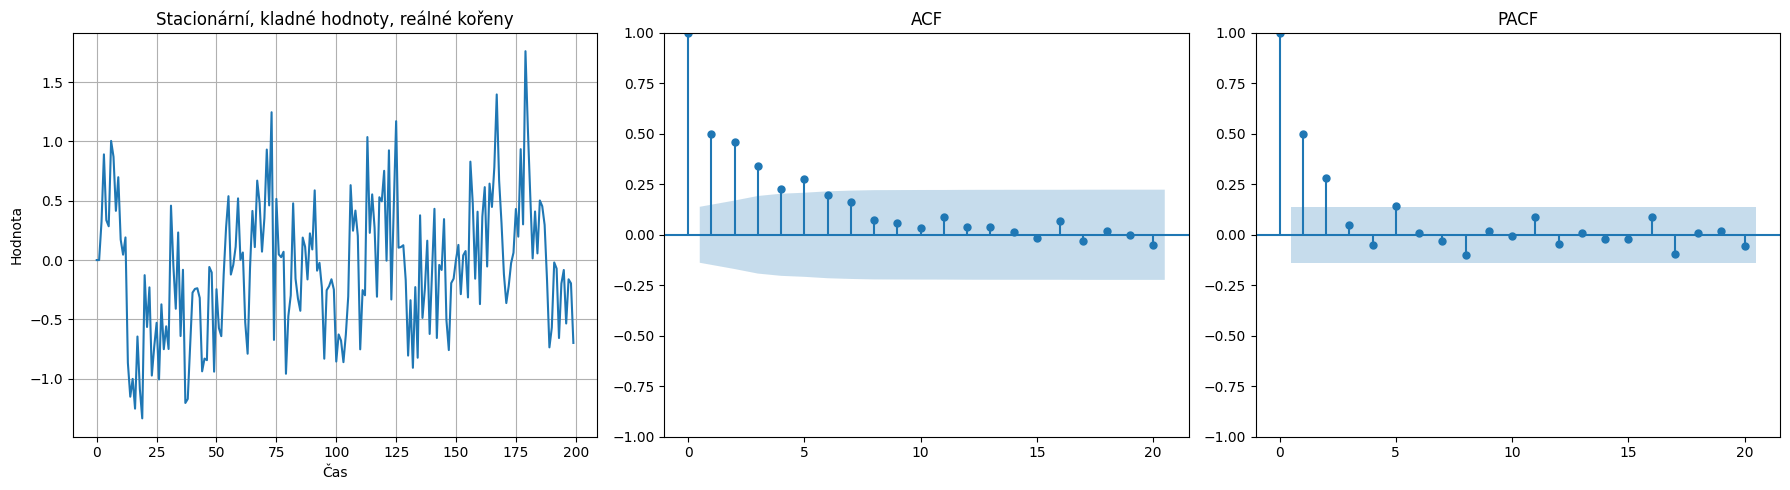

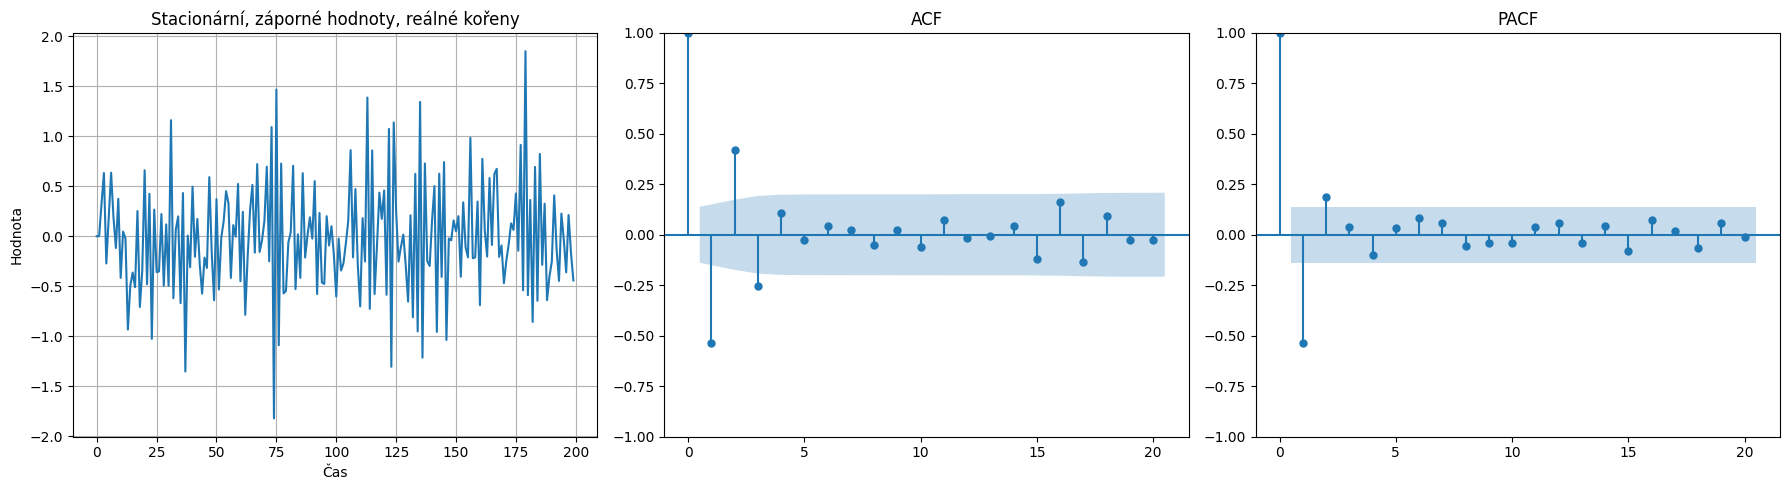

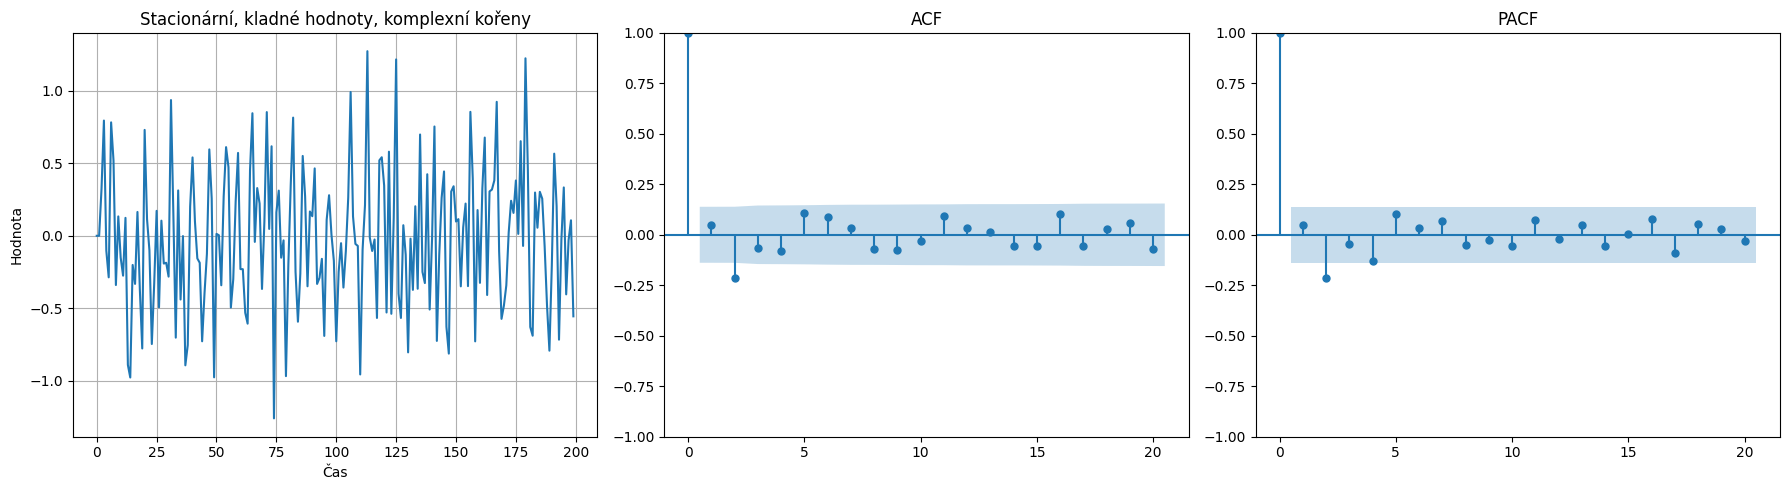

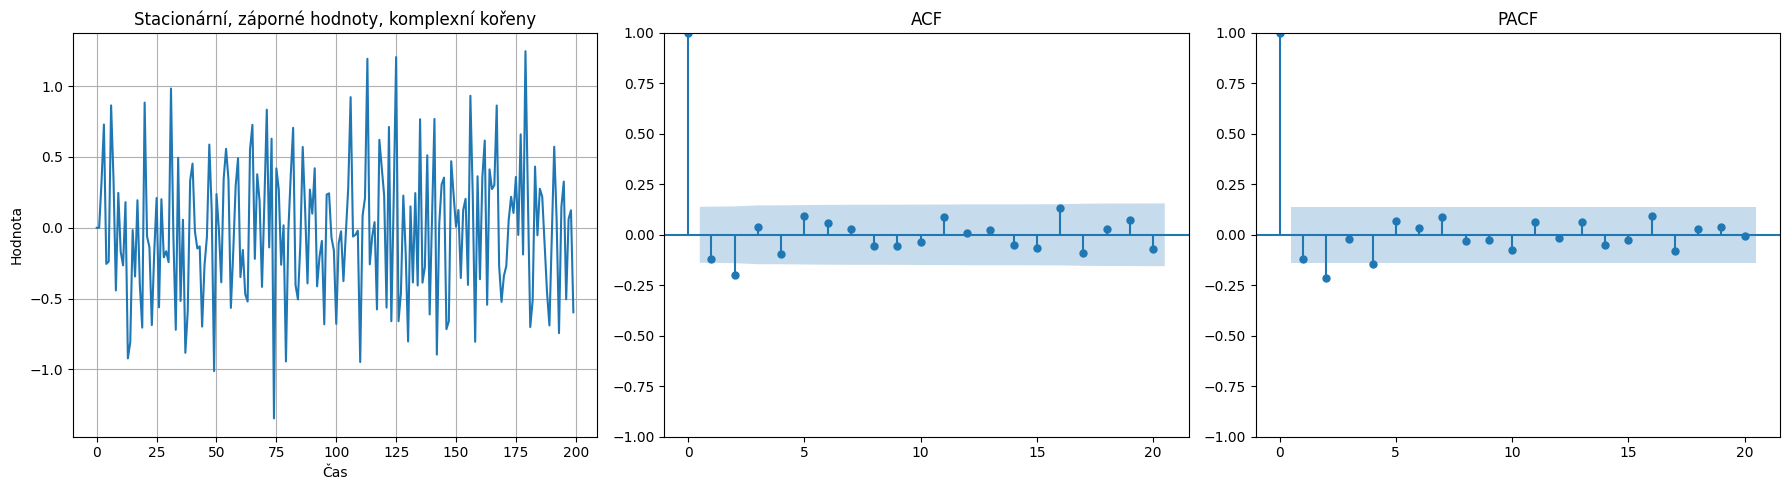

In [27]:
generate_and_plot_ar2(0.4, 0.3, 0.5, 200, "Stacionární, kladné hodnoty, reálné kořeny")

generate_and_plot_ar2(-0.4, 0.3, 0.5, 200, "Stacionární, záporné hodnoty, reálné kořeny")

generate_and_plot_ar2(0.1, -0.2, 0.5, 200, "Stacionární, kladné hodnoty, komplexní kořeny")

generate_and_plot_ar2(-0.1, -0.2, 0.5, 200, "Stacionární, záporné hodnoty, komplexní kořeny")

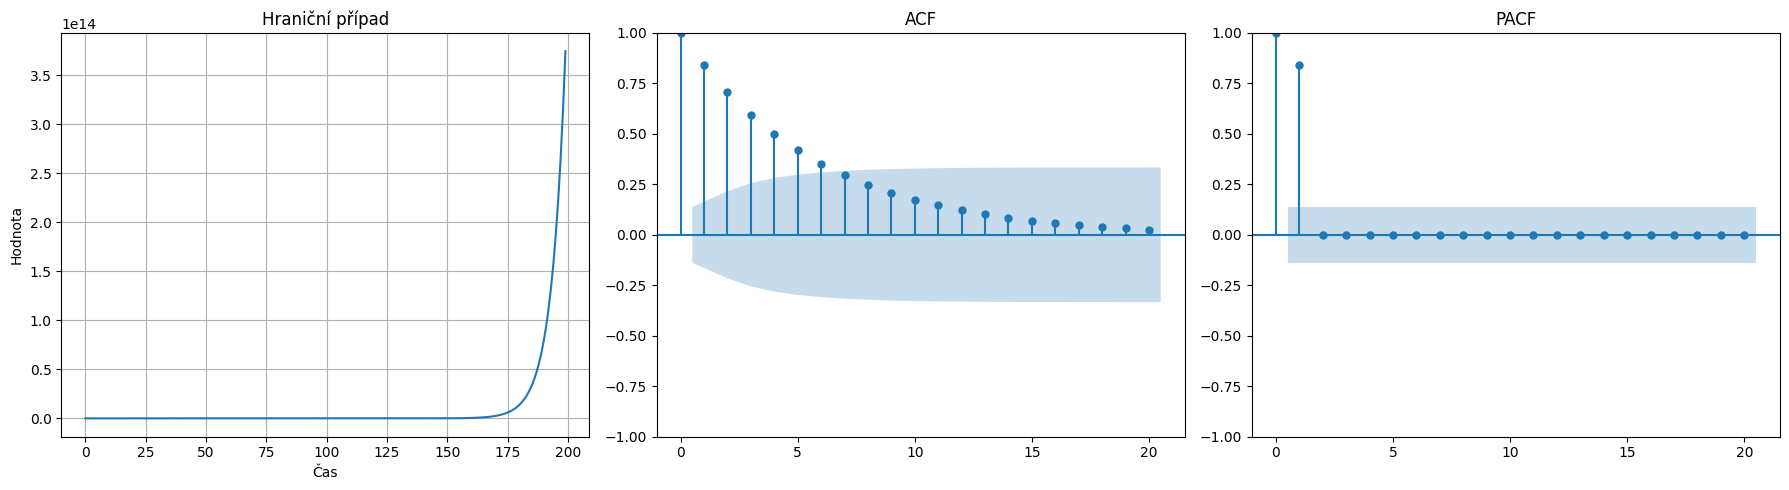

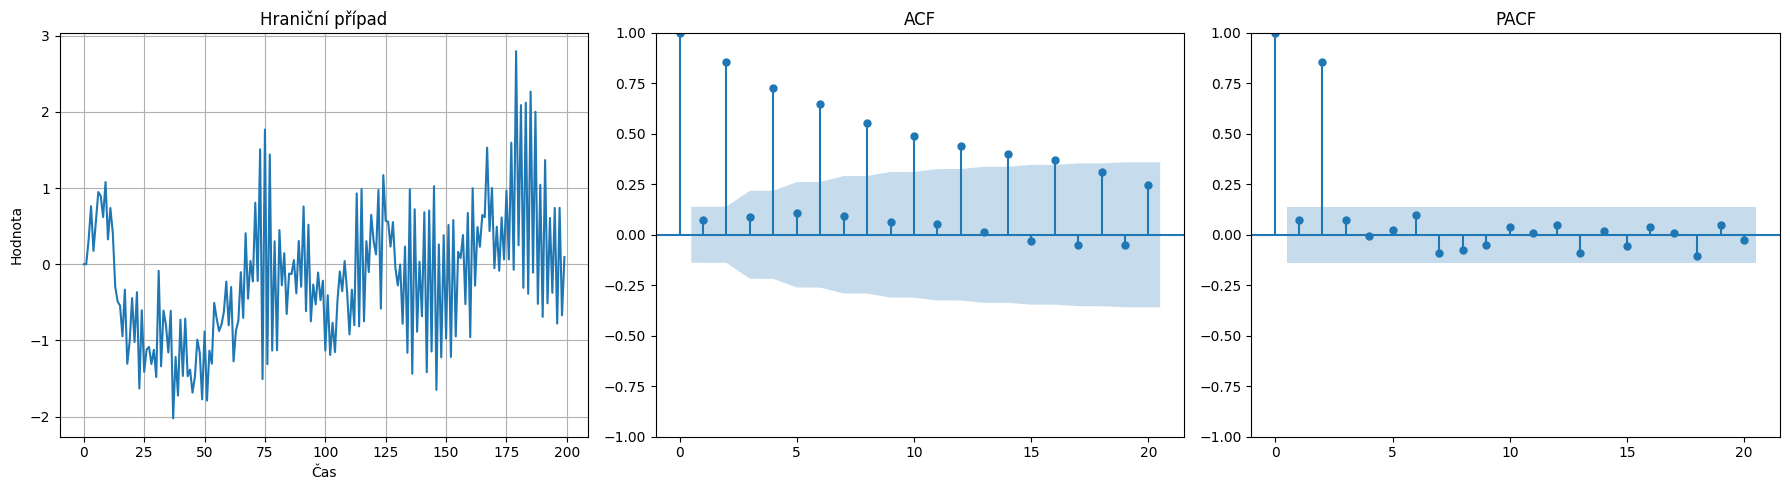

In [28]:
generate_and_plot_ar2(0.6, 0.7, 0.5, 200, "Hraniční případ")
generate_and_plot_ar2(0.001, 0.9, 0.5, 200, "Hraniční případ")

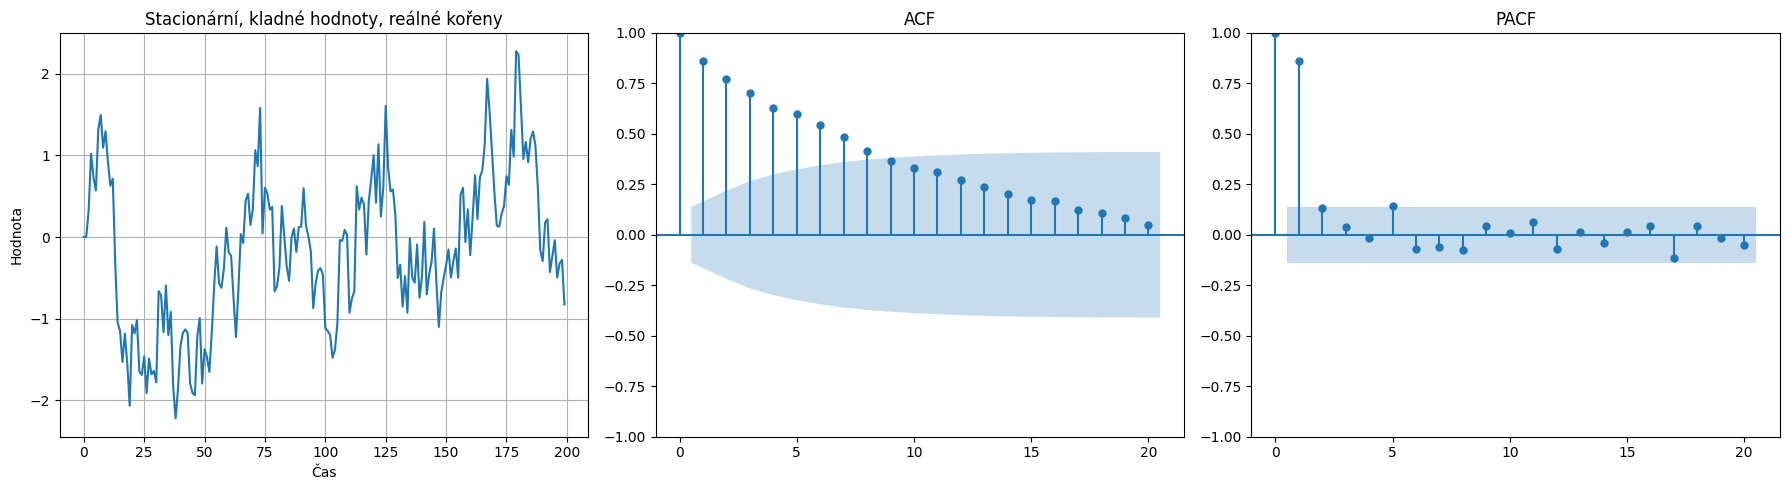

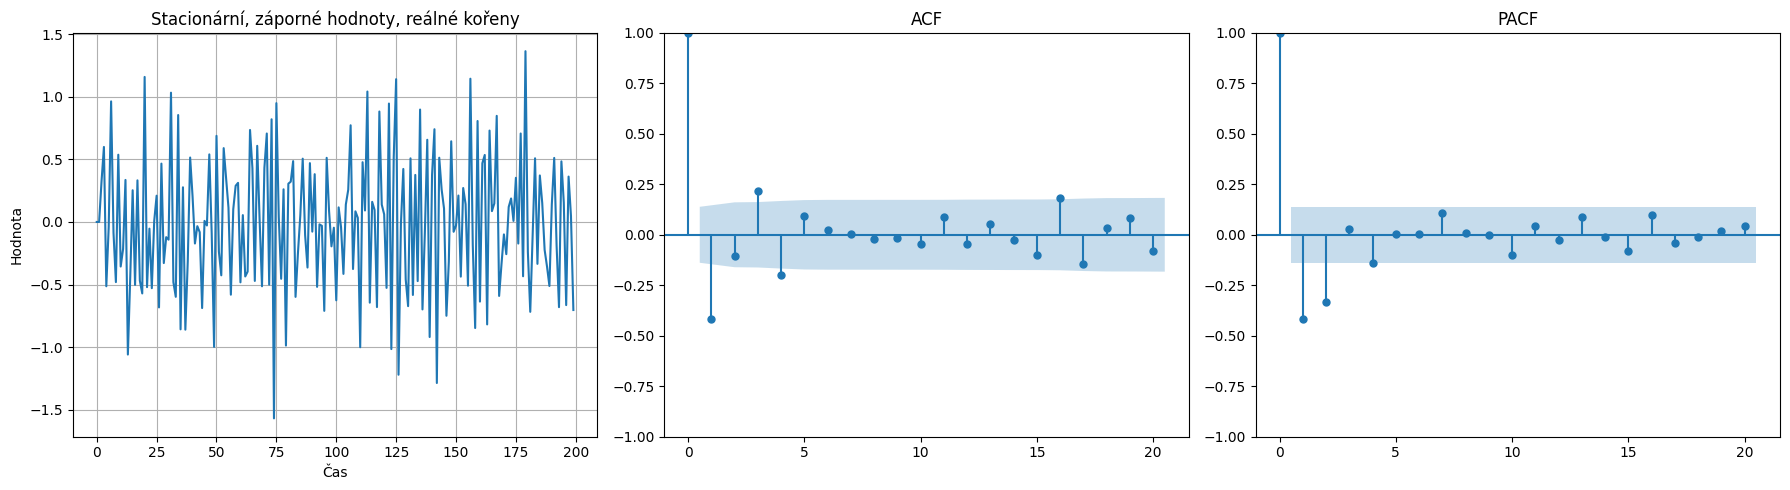

In [25]:
generate_and_plot_ar2(0.8, 0.1, 0.5, 200, "Stacionární, kladné hodnoty, reálné kořeny")

generate_and_plot_ar2(-0.5, -0.3, 0.5, 200, "Stacionární, záporné hodnoty, reálné kořeny")


Stacionární AR(2) s reálnými kořeny:
- odlišně podle toho, zda je koeficient kladný nebo záporný



### Nestacionární procesy

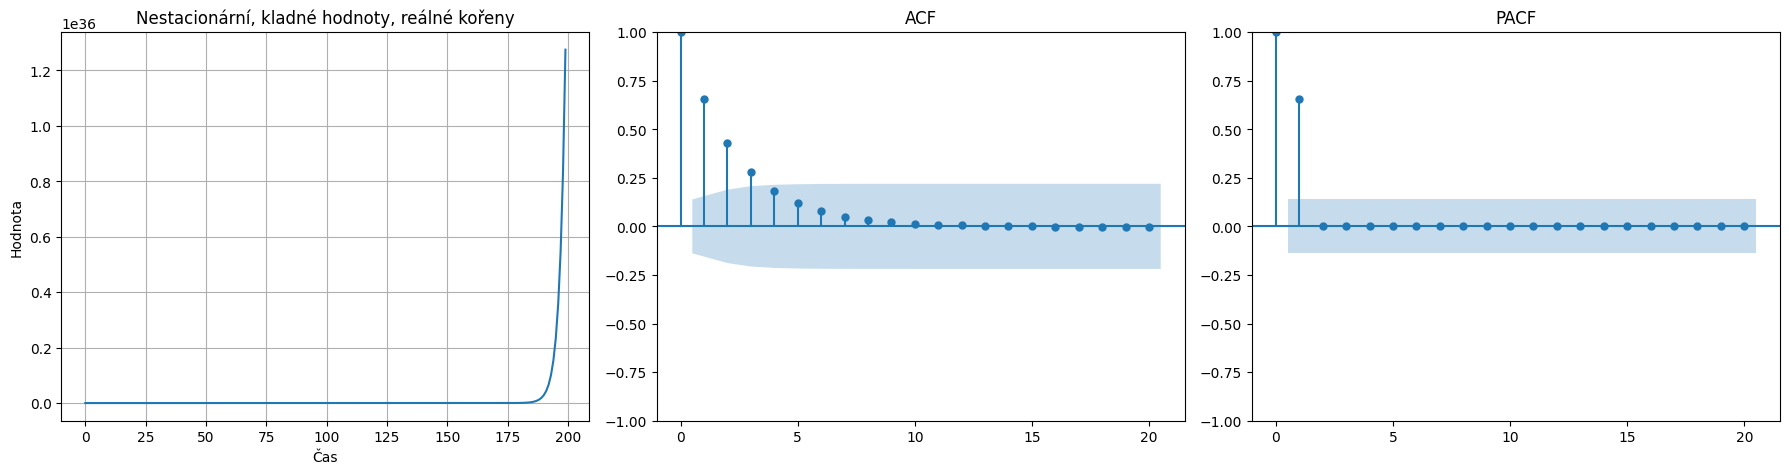

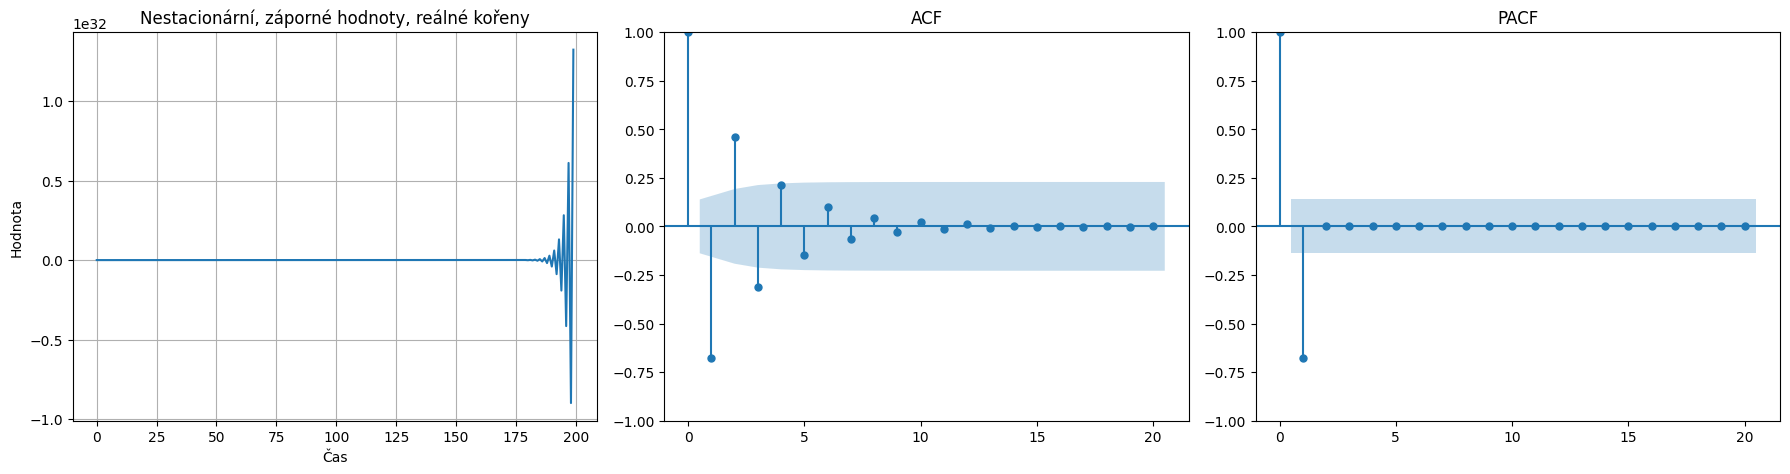

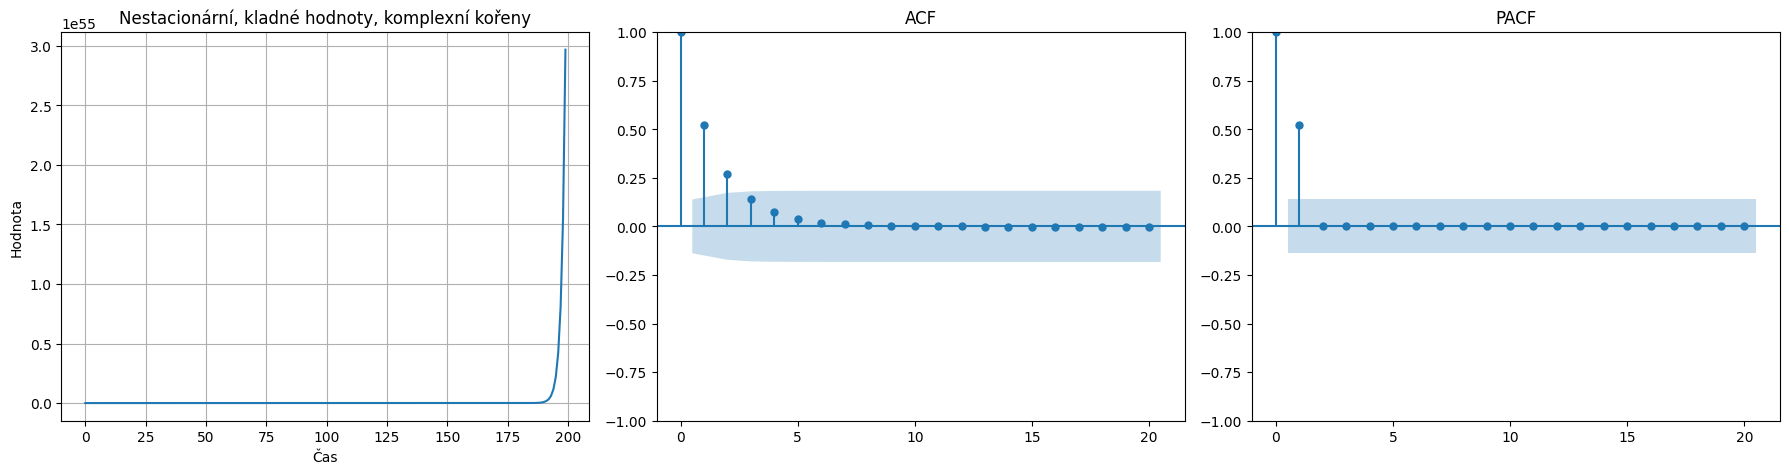

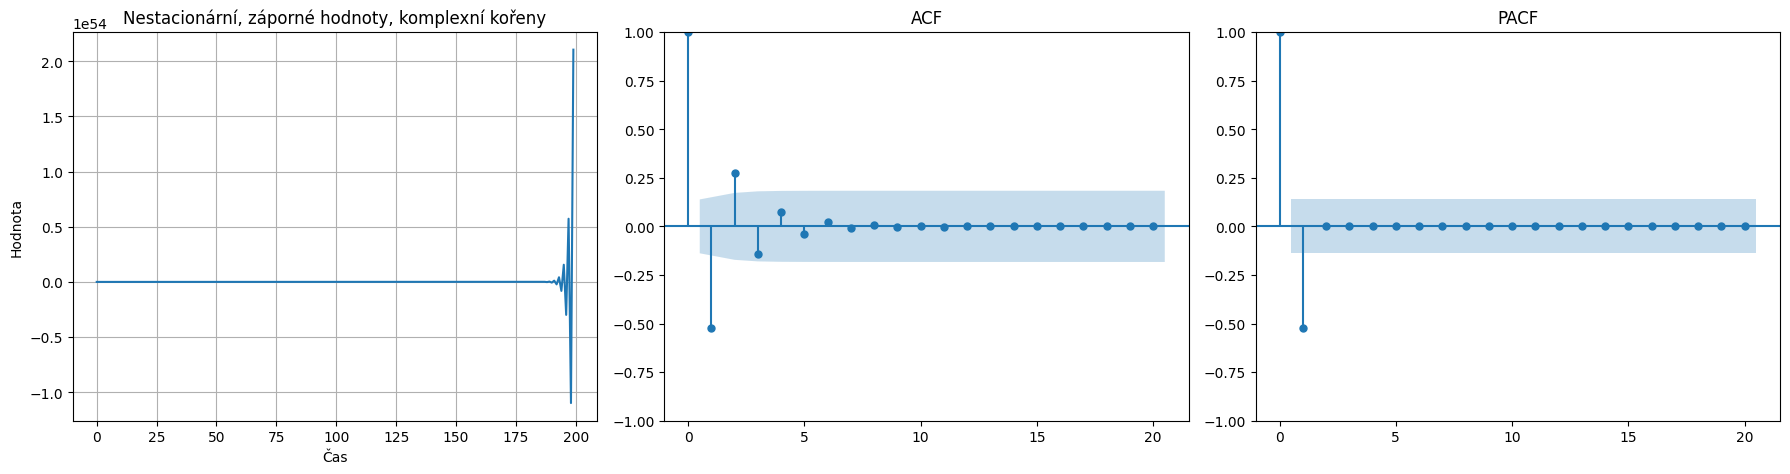

In [29]:
generate_and_plot_ar2(1.2, 0.5, 0.5, 200, "Nestacionární, kladné hodnoty, reálné kořeny")
generate_and_plot_ar2(-1.2, 0.4, 0.5, 200, "Nestacionární, záporné hodnoty, reálné kořeny")
generate_and_plot_ar2(1.5, 0.8, 0.5, 200, "Nestacionární, kladné hodnoty, komplexní kořeny")
generate_and_plot_ar2(-1.5, 0.8, 0.5, 200, "Nestacionární, záporné hodnoty, komplexní kořeny")


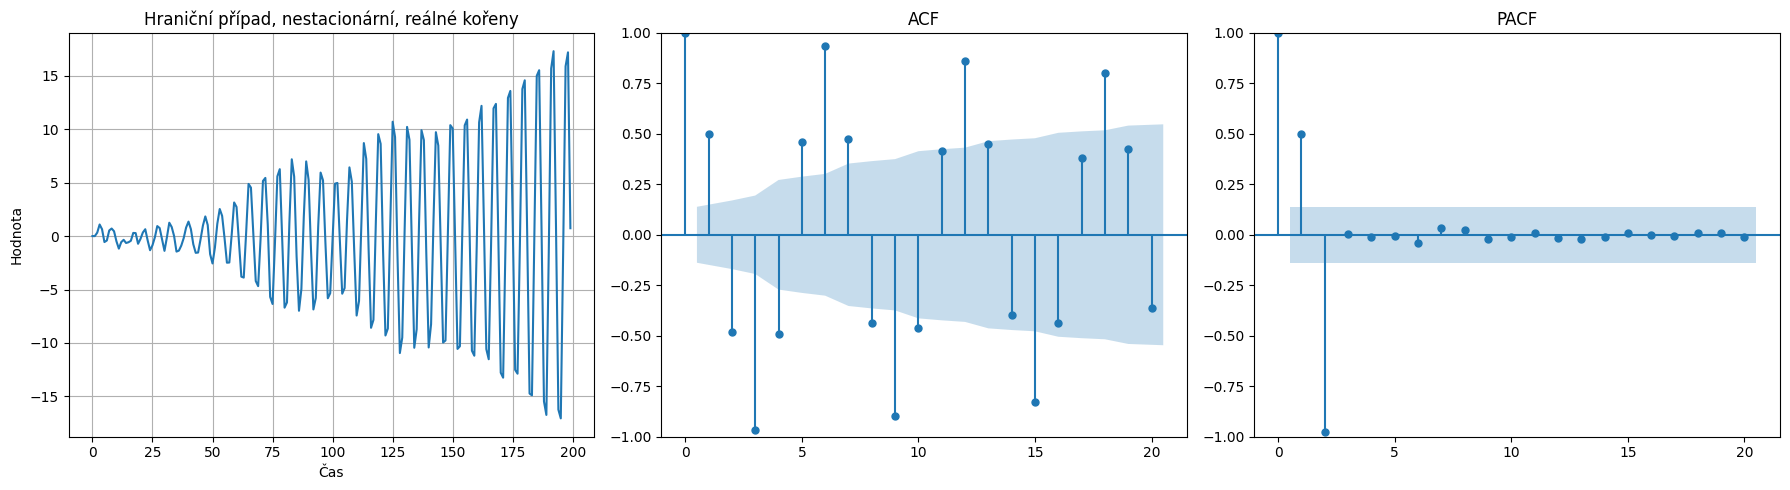

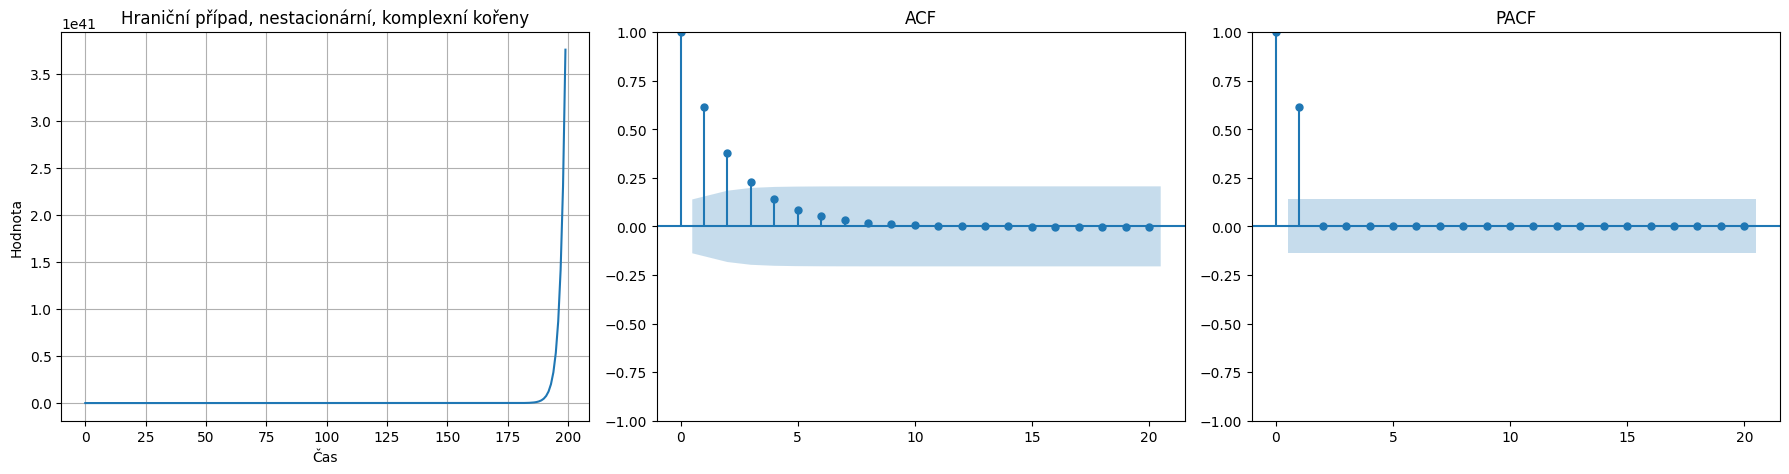

In [30]:
generate_and_plot_ar2(1.001, -1.001, 0.5, 200, "Hraniční případ, nestacionární, reálné kořeny")
generate_and_plot_ar2(1.01, 1.01, 0.5, 200, "Hraniční případ, nestacionární, komplexní kořeny")


## Závěry z analýzy stacionarity a chování AR(2) procesu

- **Vliv kořenů charakteristické rovnice na chování procesu:**
Bylo jasně pozorováno, že poloha kořenů charakteristické rovnice přímo ovlivňuje dynamiku procesu.

- **Reálné kořeny:** Proces se vyznačuje rychlým nebo pomalým návratem k rovnovážné hodnotě v závislosti na blízkosti kořenů k jednotkové kružnici.
- **Komplexní kořeny:** Proces osciluje, přičemž rychlost tlumení závisí na vzdálenosti kořenů od jednotkové kružnice.

- **Rozdíly mezi kladnými a zápornými hodnotami:** Pro kladné hodnoty koeficientů jsou časové řady méně oscilující a spíše stabilní.
Záporné hodnoty způsobují častější přechody mezi kladnými a zápornými hodnotami časové řady, což se odráží i v ACF a PACF grafech.
-** Hraniční případy:** Pokud jsou kořeny na hranici stacionarity, proces vykazuje dlouhodobou paměť a velmi pomalé tlumení, což je patrné zejména u ACF.
U komplexních kořenů na jednotkové kružnici proces vykazuje čistě periodické chování, což může být užitečné při modelování opakujících se vzorců v časových řadách.

- **Důležitost parametrů $\phi_1$ a $\phi_2$:** Změna hodnot těchto parametrů může vést k zásadní změně dynamiky procesu, od rychlého tlumení až po dlouhodobé oscilace nebo nestacionární chování.
Záporné $\phi_1$ v kombinaci s kladným $\phi_2$ způsobují výraznější oscilace, zatímco kladné $\phi_1$ a $\phi_2$ mají tendenci k tlumenějšímu chování.